In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

pd.set_option('display.max_colwidth', 200)
sns.set_style("whitegrid")

books = pd.read_csv("../data/books_cleaned.csv")
books.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when ...","Classics, Fiction, Historical Fiction, School, Literature, Young Adult, Historical",4.27,5691311,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird
1,1,"Harry Potter and the Philosopher’s Stone (Harry Potter, #1)",J.K. Rowling,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reaso...","Fantasy, Fiction, Young Adult, Magic, Childrens, Middle Grade, Classics",4.47,9278135,https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its...","Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Audiobook",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride_and_Prejudice
3,3,The Diary of a Young Girl,Anne Frank,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament ...","Classics, Nonfiction, History, Biography, Memoir, Historical, Holocaust",4.18,3488438,https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl
4,4,Animal Farm,George Orwell,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, the...","Classics, Fiction, Dystopia, Fantasy, Politics, School, Literature",3.98,3575172,https://www.goodreads.com/book/show/170448.Animal_Farm


In [19]:
books.info()
books.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       9040 non-null   object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  int64  
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
count,10000.00000,10000,10000,9923,9040,10000.000000,1.000000e+04,10000
unique,NaN,9871,6064,9888,8042,NaN,NaN,10000
top,NaN,The Nightingale,Stephen King,This is a reproduction of the original artefact. Generally these books are created from careful scans of the original. This allows us to preserve the book accurately and present it in the way the ...,Fiction,NaN,NaN,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird
freq,NaN,4,57,4,49,NaN,NaN,1
mean,4999.50000,NaN,NaN,NaN,NaN,4.068577,9.305497e+04,NaN
std,2886.89568,NaN,NaN,NaN,NaN,0.335359,3.421488e+05,NaN
min,0.00000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,2499.75000,NaN,NaN,NaN,NaN,3.880000,5.180000e+02,NaN
50%,4999.50000,NaN,NaN,NaN,NaN,4.080000,1.584350e+04,NaN
75%,7499.25000,NaN,NaN,NaN,NaN,4.260000,6.475100e+04,NaN


In [20]:
books.isnull().sum()

Unnamed: 0       0
Book             0
Author           0
Description     77
Genres         960
Avg_Rating       0
Num_Ratings      0
URL              0
dtype: int64

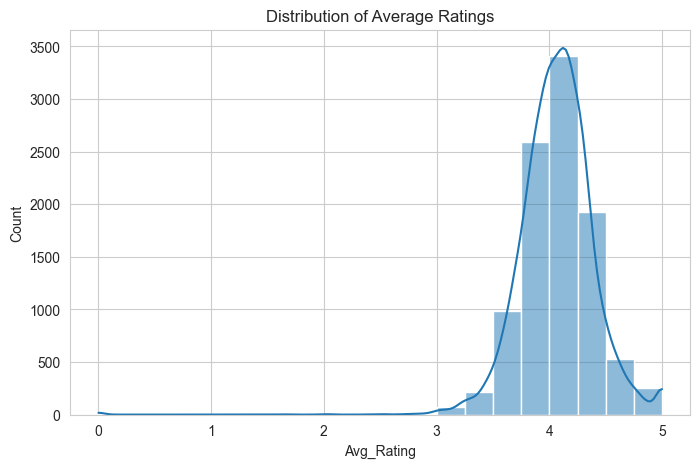

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(books['Avg_Rating'], bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.savefig("../outputs/ratings_distribution.png", bbox_inches="tight")
plt.show()

In [22]:
genre_list = []
for g in books['Genres'].dropna():
    genre_list.extend([x.strip() for x in g.split(",")])

top_genres = Counter(genre_list).most_common(10)
pd.DataFrame(top_genres, columns=["Genre", "Count"])

,Genre,Count
0,Fiction,5700
1,Nonfiction,2330
2,Fantasy,2195
3,Classics,2123
4,Romance,1558
5,Young Adult,1522
6,Historical Fiction,1481
7,Mystery,1357
8,Contemporary,1302
9,Audiobook,1242


C:\Users\gitan\AppData\Local\Temp\ipykernel_19732\1301044204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


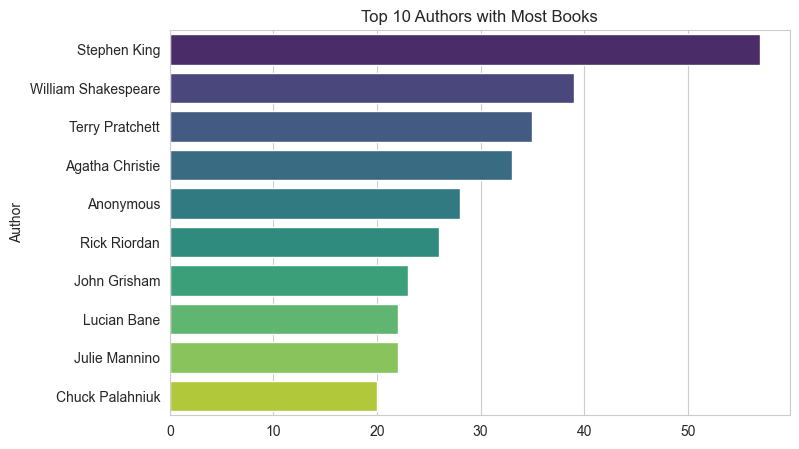

In [23]:
top_authors = books['Author'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors with Most Books")
plt.savefig("../outputs/top_authors.png", bbox_inches="tight")
plt.show()

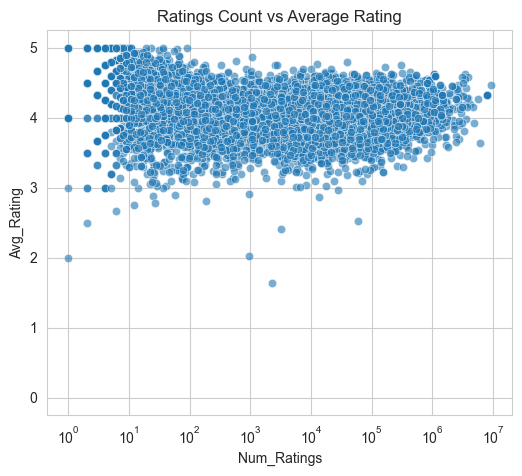

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Num_Ratings", y="Avg_Rating", data=books, alpha=0.6)
plt.xscale("log")
plt.title("Ratings Count vs Average Rating")
plt.savefig("../outputs/ratings_vs_count.png", bbox_inches="tight")
plt.show()

In [29]:
books[['Book', 'Author', 'Genres', 'Avg_Rating']].sample(5)

,Book,Author,Genres,Avg_Rating
4198,The Ipswich Bus,Robbie Franklin,Poetry,4.72
2396,Ask and It Is Given: Learning to Manifest Your Desires,Esther Hicks,"Spirituality, Self Help, Nonfiction, Personal Development, Psychology, Inspirational, New Age",4.18
1906,The Worst Hard Time: The Untold Story of Those Who Survived the Great American Dust Bowl,Timothy Egan,"History, Nonfiction, American History, Historical, Audiobook, Environment, Nature",4.04
6482,Annihilation of Caste,B.R. Ambedkar,"Nonfiction, India, History, Politics, Philosophy, Sociology, Religion",4.62
3608,The 5 Elements of Effective Thinking,Edward B. Burger,"Nonfiction, Psychology, Self Help, Personal Development, Business, Productivity, Philosophy",4.00


In [31]:
print("Dataset cleaned and ready for feature engineering.")
print(f"Total books: {books.shape[0]}")
print(f"Unique authors: {books['Author'].nunique()}")

Dataset cleaned and ready for feature engineering.
Total books: 10000
Unique authors: 6064
